In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import saspy
import sys

##For QQ Plot
import scipy.stats as sts

import statsmodels.formula.api as smf
import statsmodels.api as sm

##For variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_excel('InformsDataset_ALLMovieData_cleanish.xlsx')

In [3]:
data.head()

,Movie_Title,Sequel Indicator,Genre_Groups,release_year,premiere,Duration,Platform,release_type,content_rating,imdb_score,...,movie_facebook_likes,Worldwide Box Office,Domestic Share,Theatrical Distributor,Production Method,Maximum Theaters,Opening Weekend Revenue,Released,Opening Weekend Theaters,Theatrical Engagements
0,Harry Potter and the Deathly Hallows: Part I,1,Fantasy,2010,2010-11-19,146.0,Theatrical,Theater,PG-13,6.4,...,25.0,9.553719e+08,0.3100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry Potter and the Deathly Hallows: Part II,1,Action & Adventure,2011,2011-07-15,130.0,Theatrical,Theater,PG-13,7.5,...,40.0,1.334393e+09,0.2857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Should've Been Romeo,0,Comedy,2012,2012-04-28,NaN,Theatrical,Theater,NR,6.7,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Lovers,0,Action & Adventure,2015,2015-02-13,109.0,Theatrical,Theater,R,4.5,...,677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Good Dinosaur,0,Animation & Family,2015,2015-11-14,93.0,Theatrical,Theater,PG,6.8,...,20000.0,3.337710e+08,0.3688,Walt Disney,Digital Animation,3749.0,NaN,25Nov2015,3749.0,22239.0


In [4]:
data.shape

(1915, 30)

In [5]:
##This gives all column names for reference later
data.columns

Index(['Movie_Title', 'Sequel Indicator', 'Genre_Groups', 'release_year',
       'premiere', 'Duration', 'Platform', 'release_type', 'content_rating',
       'imdb_score', 'rotten_score', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_1_facebook_likes',
       'Box Office Revenue', 'num_voted_users', 'facenumber_in_poster',
       'num_user_for_reviews', 'country', 'budget (Millions)',
       'movie_facebook_likes', 'Worldwide Box Office', 'Domestic Share',
       'Theatrical Distributor', 'Production Method', 'Maximum Theaters',
       'Opening Weekend Revenue', 'Released', 'Opening Weekend Theaters',
       'Theatrical Engagements'],
      dtype='object')

In [6]:
##Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sequel Indicator,1915.0,1.357702e-01,3.426339e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
release_year,1915.0,2.014448e+03,3.085136e+00,2.010000e+03,2.012000e+03,2.014000e+03,2.017000e+03,2.021000e+03
Duration,1906.0,1.060094e+02,1.880632e+01,4.100000e+01,9.300000e+01,1.030000e+02,1.160000e+02,2.400000e+02
imdb_score,1832.0,6.249454e+00,1.076663e+00,1.600000e+00,5.700000e+00,6.400000e+00,7.000000e+00,8.800000e+00
rotten_score,92.0,1.018804e+00,4.334296e+00,0.000000e+00,2.775000e-01,7.200000e-01,8.825000e-01,4.200000e+01
num_critic_for_reviews,1309.0,2.097219e+02,1.805558e+02,1.000000e+00,6.100000e+01,1.800000e+02,3.130000e+02,2.270000e+03
director_facebook_likes,1328.0,5.802756e+02,2.623431e+03,0.000000e+00,8.000000e+00,5.100000e+01,1.790000e+02,2.300000e+04
actor_1_facebook_likes,1323.0,7.841387e+03,1.386574e+04,0.000000e+00,6.955000e+02,1.000000e+03,1.300000e+04,2.600000e+05
Box Office Revenue,1050.0,6.920404e+07,1.461193e+08,1.332000e+03,7.581966e+06,3.442882e+07,7.949504e+07,2.797501e+09
num_voted_users,1643.0,9.287264e+04,1.357004e+05,5.000000e+00,7.371000e+03,4.370900e+04,1.147550e+05,1.468200e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Movie_Title               1915 non-null   object        
 1   Sequel Indicator          1915 non-null   int64         
 2   Genre_Groups              1915 non-null   object        
 3   release_year              1915 non-null   int64         
 4   premiere                  1687 non-null   datetime64[ns]
 5   Duration                  1906 non-null   float64       
 6   Platform                  1915 non-null   object        
 7   release_type              1915 non-null   object        
 8   content_rating            1628 non-null   object        
 9   imdb_score                1832 non-null   float64       
 10  rotten_score              92 non-null     float64       
 11  num_critic_for_reviews    1309 non-null   float64       
 12  director_facebook_li

Target Variable: Revenue

In [8]:
##Create theater only dataset
theater_df = data[data['release_type'] =='Theater']

In [9]:
theater_df.head()

,Movie_Title,Sequel Indicator,Genre_Groups,release_year,premiere,Duration,Platform,release_type,content_rating,imdb_score,...,movie_facebook_likes,Worldwide Box Office,Domestic Share,Theatrical Distributor,Production Method,Maximum Theaters,Opening Weekend Revenue,Released,Opening Weekend Theaters,Theatrical Engagements
0,Harry Potter and the Deathly Hallows: Part I,1,Fantasy,2010,2010-11-19,146.0,Theatrical,Theater,PG-13,6.4,...,25.0,9.553719e+08,0.3100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry Potter and the Deathly Hallows: Part II,1,Action & Adventure,2011,2011-07-15,130.0,Theatrical,Theater,PG-13,7.5,...,40.0,1.334393e+09,0.2857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Should've Been Romeo,0,Comedy,2012,2012-04-28,NaN,Theatrical,Theater,NR,6.7,...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Lovers,0,Action & Adventure,2015,2015-02-13,109.0,Theatrical,Theater,R,4.5,...,677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Good Dinosaur,0,Animation & Family,2015,2015-11-14,93.0,Theatrical,Theater,PG,6.8,...,20000.0,3.337710e+08,0.3688,Walt Disney,Digital Animation,3749.0,NaN,25Nov2015,3749.0,22239.0


In [10]:
theater_df.shape

(1649, 30)

In [11]:
theater_df['Box Office Revenue'].describe().apply("{0:.2f}".format)

count          1050.00
mean       69204043.51
std       146119252.25
min            1332.00
25%         7581966.50
50%        34428816.00
75%        79495041.00
max      2797501328.00
Name: Box Office Revenue, dtype: object

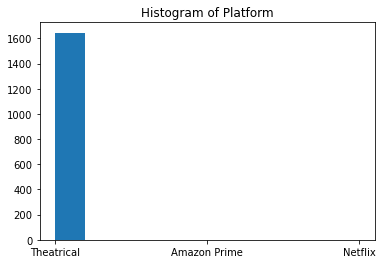

In [12]:
plt.hist(theater_df['Platform'])
plt.title('Histogram of Platform')
plt.show()

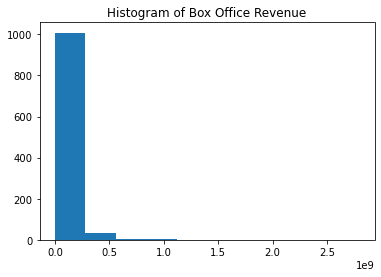

In [13]:
plt.hist(theater_df['Box Office Revenue'])
plt.title('Histogram of Box Office Revenue')
plt.show()

In [14]:
theater_df.isnull().sum()

Movie_Title                    0
Sequel Indicator               0
Genre_Groups                   0
release_year                   0
premiere                     218
Duration                       1
Platform                       0
release_type                   0
content_rating               286
imdb_score                     0
rotten_score                1645
num_critic_for_reviews       340
director_facebook_likes      321
actor_1_facebook_likes       326
Box Office Revenue           599
num_voted_users               16
facenumber_in_poster         336
num_user_for_reviews         331
country                      323
budget (Millions)            384
movie_facebook_likes         323
Worldwide Box Office         695
Domestic Share               702
Theatrical Distributor      1508
Production Method           1508
Maximum Theaters            1507
Opening Weekend Revenue     1572
Released                    1515
Opening Weekend Theaters    1515
Theatrical Engagements      1515
dtype: int

# Data Preprocesssing

In [15]:
#This removes all variables with more than 80% missing values. These will not be useful for prediction. 
imputable_theater_df = theater_df[theater_df.columns[theater_df.isnull().mean() < 0.8]]

In [16]:
## This splits data into 70% training and 30% testing dataset
training_data = imputable_theater_df.sample(frac=0.7, random_state=67)
testing_data = imputable_theater_df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1154
No. of testing examples: 495


In [17]:
df_orig = training_data.copy()

In [18]:
##This calls on a random forest imputation
import sklearn.neighbors._base 
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

imputer = MissForest()

In [19]:
## This removes the target from the training dataset
x = training_data.drop("Box Office Revenue" , axis=1)
x = x.select_dtypes(['number'])

In [20]:
x.head()

,Sequel Indicator,release_year,Duration,imdb_score,num_critic_for_reviews,director_facebook_likes,actor_1_facebook_likes,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget (Millions),movie_facebook_likes,Worldwide Box Office,Domestic Share
1625,0,2011,118.0,6.4,215.0,71.0,16000.0,136680.0,2.0,149.0,52.00,13000.0,75997067.0,0.4901
97,1,2017,129.0,6.5,NaN,NaN,NaN,268326.0,NaN,NaN,NaN,NaN,794861794.0,0.2171
601,0,2012,93.0,3.4,13.0,9.0,743.0,485.0,0.0,5.0,0.06,284.0,NaN,NaN
1320,0,2013,121.0,7.3,322.0,53.0,19000.0,67797.0,3.0,285.0,25.00,30000.0,50738810.0,0.7438
1655,0,2016,144.0,7.4,204.0,0.0,769.0,47764.0,0.0,219.0,50.00,44000.0,NaN,NaN


In [21]:
missing_values_df = x[x.columns[x.isnull().sum() > 1]]

In [22]:
x.isnull().sum() 

Sequel Indicator             0
release_year                 0
Duration                     0
imdb_score                   0
num_critic_for_reviews     241
director_facebook_likes    226
actor_1_facebook_likes     229
num_voted_users              7
facenumber_in_poster       234
num_user_for_reviews       233
budget (Millions)          266
movie_facebook_likes       227
Worldwide Box Office       487
Domestic Share             492
dtype: int64

In [23]:
missing_values_df

,num_critic_for_reviews,director_facebook_likes,actor_1_facebook_likes,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget (Millions),movie_facebook_likes,Worldwide Box Office,Domestic Share
1625,215.0,71.0,16000.0,136680.0,2.0,149.0,52.00,13000.0,75997067.0,0.4901
97,NaN,NaN,NaN,268326.0,NaN,NaN,NaN,NaN,794861794.0,0.2171
601,13.0,9.0,743.0,485.0,0.0,5.0,0.06,284.0,NaN,NaN
1320,322.0,53.0,19000.0,67797.0,3.0,285.0,25.00,30000.0,50738810.0,0.7438
1655,204.0,0.0,769.0,47764.0,0.0,219.0,50.00,44000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
201,NaN,NaN,NaN,9872.0,NaN,NaN,NaN,NaN,NaN,NaN
1368,419.0,120.0,13000.0,265507.0,0.0,388.0,15.00,90000.0,123327692.0,0.2910
714,10.0,0.0,685.0,241.0,3.0,5.0,0.30,261.0,NaN,NaN
1663,242.0,24.0,5000.0,117096.0,1.0,271.0,70.00,24000.0,160379930.0,0.3886


In [24]:
x_imputed = imputer.fit_transform(missing_values_df)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


In [25]:
df_orig['mf_num_critic_for_reviews'] = x_imputed[:,0]
df_orig['mf_director_facebook_likes'] = x_imputed[:,1]
df_orig['mf_actor_1_facebook_likes'] = x_imputed[:,2]
df_orig['mf_num_voted_users'] = x_imputed[:,3]
df_orig['mf_facenumber_in_poster'] = x_imputed[:,4]
df_orig['mf_num_user_for_reviews'] = x_imputed[:,5]
df_orig['mf_budget (Millions)'] = x_imputed[:,6]
df_orig['mf_movie_facebook_likes'] = x_imputed[:,7]
df_orig['mf_Worldwide Box Office'] = x_imputed[:,8]
df_orig['mf_Domestic Share'] = x_imputed[:,9]

#this will filter out only the transformed values
imputed_df = df_orig.filter(regex='mf')

In [26]:
imputed_df

,mf_num_critic_for_reviews,mf_director_facebook_likes,mf_actor_1_facebook_likes,mf_num_voted_users,mf_facenumber_in_poster,mf_num_user_for_reviews,mf_budget (Millions),mf_movie_facebook_likes,mf_Worldwide Box Office,mf_Domestic Share
1625,215.00,71.00,16000.00,136680.00,2.00,149.00,52.000,13000.0,7.599707e+07,0.490100
97,430.72,1612.25,18632.94,268326.00,2.59,679.45,164.170,65930.0,7.948618e+08,0.217100
601,13.00,9.00,743.00,485.00,0.00,5.00,0.060,284.0,5.035034e+07,0.534416
1320,322.00,53.00,19000.00,67797.00,3.00,285.00,25.000,30000.0,5.073881e+07,0.743800
1655,204.00,0.00,769.00,47764.00,0.00,219.00,50.000,44000.0,1.467981e+08,0.431140
...,...,...,...,...,...,...,...,...,...,...
201,77.95,80.90,886.50,9872.00,1.88,49.53,12.307,70.0,3.039026e+07,0.902508
1368,419.00,120.00,13000.00,265507.00,0.00,388.00,15.000,90000.0,1.233277e+08,0.291000
714,10.00,0.00,685.00,241.00,3.00,5.00,0.300,261.0,3.490455e+07,0.619888
1663,242.00,24.00,5000.00,117096.00,1.00,271.00,70.000,24000.0,1.603799e+08,0.388600


In [27]:
imputed_df.isnull().sum()

mf_num_critic_for_reviews     0
mf_director_facebook_likes    0
mf_actor_1_facebook_likes     0
mf_num_voted_users            0
mf_facenumber_in_poster       0
mf_num_user_for_reviews       0
mf_budget (Millions)          0
mf_movie_facebook_likes       0
mf_Worldwide Box Office       0
mf_Domestic Share             0
dtype: int64

In [28]:
# Drop original columns for modeling. 
df_orig2 = df_orig.drop(['num_critic_for_reviews', 'director_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews', 'budget (Millions)', 'movie_facebook_likes', 'Worldwide Box Office', 'Domestic Share'], axis=1)

In [29]:
non_imputcols = x.columns[x.isnull().sum() < 1]

In [30]:
non_imputcols

Index(['Sequel Indicator', 'release_year', 'Duration', 'imdb_score'], dtype='object')

In [31]:
training_data2 = pd.concat([df_orig2, imputed_df], axis=1)

In [79]:
target = training_data["Box Office Revenue"]

In [80]:
training_with_target= pd.concat([training_data2, target], axis=1)

In [81]:
training_with_target.head()

,Movie_Title,Sequel Indicator,Genre_Groups,release_year,premiere,Duration,Platform,release_type,content_rating,imdb_score,...,mf_director_facebook_likes,mf_actor_1_facebook_likes,mf_num_voted_users,mf_facenumber_in_poster,mf_num_user_for_reviews,mf_budget (Millions),mf_movie_facebook_likes,mf_Worldwide Box Office,mf_Domestic Share,Box Office Revenue
1625,The Change-Up,0,Comedy,2011,2011-08-05,118.0,Theatrical,Theater,R,6.4,...,71.00,16000.00,136680.0,2.00,149.00,52.00,13000.0,7.599707e+07,0.490100,37035845.0
97,Pirates of the Caribbean: Dead Men Tell No Tales,1,Action & Adventure,2017,2017-05-11,129.0,Theatrical,Theater,NaN,6.5,...,1612.25,18632.94,268326.0,2.59,679.45,164.17,65930.0,7.948618e+08,0.217100,NaN
601,Hayride,0,Crime,2012,2012-10-13,93.0,Theatrical,Theater,NR,3.4,...,9.00,743.00,485.0,0.00,5.00,0.06,284.0,5.035034e+07,0.534416,NaN
1320,August: Osage County,0,Drama,2013,2013-12-26,121.0,Theatrical,Theater,R,7.3,...,53.00,19000.00,67797.0,3.00,285.00,25.00,30000.0,5.073881e+07,0.743800,37738400.0
1655,13 Hours,0,Action & Adventure,2016,2016-01-12,144.0,Theatrical,Theater,R,7.4,...,0.00,769.00,47764.0,0.00,219.00,50.00,44000.0,1.467981e+08,0.431140,52822418.0


In [82]:
training_data2.shape

(1154, 32)

In [118]:
training_data3 = training_data2.loc[:,~training_data2.columns.duplicated()]

In [119]:
training_data3.isnull().sum() 

Movie_Title                     0
Sequel Indicator                0
Genre_Groups                    0
release_year                    0
premiere                      149
Duration                        0
Platform                        0
release_type                    0
content_rating                206
imdb_score                      0
Box Office Revenue            423
country                       227
mf_num_critic_for_reviews       0
mf_director_facebook_likes      0
mf_actor_1_facebook_likes       0
mf_num_voted_users              0
mf_facenumber_in_poster         0
mf_num_user_for_reviews         0
mf_budget (Millions)            0
mf_movie_facebook_likes         0
mf_Worldwide Box Office         0
mf_Domestic Share               0
dtype: int64

In [120]:
# this will remove any columns with more then 80% missing data. These variables are useless anyways. 
predict_train_data2 = training_data3.dropna(axis=0)

In [121]:
predict_train_data2.isnull().sum() 

Movie_Title                   0
Sequel Indicator              0
Genre_Groups                  0
release_year                  0
premiere                      0
Duration                      0
Platform                      0
release_type                  0
content_rating                0
imdb_score                    0
Box Office Revenue            0
country                       0
mf_num_critic_for_reviews     0
mf_director_facebook_likes    0
mf_actor_1_facebook_likes     0
mf_num_voted_users            0
mf_facenumber_in_poster       0
mf_num_user_for_reviews       0
mf_budget (Millions)          0
mf_movie_facebook_likes       0
mf_Worldwide Box Office       0
mf_Domestic Share             0
dtype: int64

In [128]:
#remove post distribution factors and unneeded variables
predict_train_data3 = predict_train_data2.drop(['Movie_Title', 'release_type', 'mf_Worldwide Box Office', 'country', 'Platform'], axis=1)

In [129]:
#convert categorical variables to numeric indicators
cat_columns = predict_train_data3.select_dtypes(['object']).columns

In [130]:
print(cat_columns)

Index(['Genre_Groups', 'content_rating'], dtype='object')


In [135]:
#creates dummy variables for categorical values. This is needed for regression in python
dummy_var = pd.get_dummies(predict_train_data3[cat_columns])

In [136]:
predict_train_data4 = predict_train_data3.drop(cat_columns, axis=1)
training_data4 = pd.concat([predict_train_data4, dummy_var], axis=1)

In [137]:
training_data4['day'] = training_data4['premiere'].dt.day
training_data4['month'] = training_data4['premiere'].dt.month

In [138]:
training_data4

,Sequel Indicator,release_year,premiere,Duration,imdb_score,Box Office Revenue,mf_num_critic_for_reviews,mf_director_facebook_likes,mf_actor_1_facebook_likes,mf_num_voted_users,...,Genre_Groups_Romance,Genre_Groups_Sci-Fi,Genre_Groups_Thriller,content_rating_G,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,day,month
1625,0,2011,2011-08-05,118.0,6.4,37035845.0,215.0,71.0,16000.0,136680.0,...,0,0,0,0,0,0,0,1,5,8
1320,0,2013,2013-12-26,121.0,7.3,37738400.0,322.0,53.0,19000.0,67797.0,...,0,0,0,0,0,0,0,1,26,12
1655,0,2016,2016-01-12,144.0,7.4,52822418.0,204.0,0.0,769.0,47764.0,...,0,0,0,0,0,0,0,1,12,1
1136,0,2014,2014-05-18,122.0,6.6,2428883.0,208.0,0.0,883.0,21370.0,...,0,0,0,0,0,0,0,1,18,5
1356,0,2012,2012-01-13,118.0,5.7,30920167.0,98.0,650.0,1000.0,6476.0,...,0,0,0,0,0,0,1,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0,2014,2014-12-30,125.0,7.0,5749134.0,350.0,78.0,1000.0,45799.0,...,0,0,0,0,0,0,0,1,30,12
1820,1,2016,2016-07-27,123.0,7.1,108521835.0,267.0,521.0,13000.0,40123.0,...,0,0,0,0,0,0,1,0,27,7
1368,0,2014,2014-11-26,123.0,7.7,35887263.0,419.0,120.0,13000.0,265507.0,...,0,0,0,0,0,0,1,0,26,11
714,0,2014,2014-03-29,95.0,4.8,2468.0,10.0,0.0,685.0,241.0,...,0,0,1,0,0,0,0,1,29,3


In [139]:
training_data5 = training_data4.drop(['premiere'], axis=1)

In [140]:
training_data5.head()

,Sequel Indicator,release_year,Duration,imdb_score,Box Office Revenue,mf_num_critic_for_reviews,mf_director_facebook_likes,mf_actor_1_facebook_likes,mf_num_voted_users,mf_facenumber_in_poster,...,Genre_Groups_Romance,Genre_Groups_Sci-Fi,Genre_Groups_Thriller,content_rating_G,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,day,month
1625,0,2011,118.0,6.4,37035845.0,215.0,71.0,16000.0,136680.0,2.0,...,0,0,0,0,0,0,0,1,5,8
1320,0,2013,121.0,7.3,37738400.0,322.0,53.0,19000.0,67797.0,3.0,...,0,0,0,0,0,0,0,1,26,12
1655,0,2016,144.0,7.4,52822418.0,204.0,0.0,769.0,47764.0,0.0,...,0,0,0,0,0,0,0,1,12,1
1136,0,2014,122.0,6.6,2428883.0,208.0,0.0,883.0,21370.0,1.0,...,0,0,0,0,0,0,0,1,18,5
1356,0,2012,118.0,5.7,30920167.0,98.0,650.0,1000.0,6476.0,4.0,...,0,0,0,0,0,0,1,0,13,1


Export to csv for modeling

In [43]:
#training_data3.to_csv('informs21preprossdata.csv')

# Modeling Time

Variable Selection

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = LinearRegression()

In [142]:
y = training_data5['Box Office Revenue']
x = training_data5.drop(['Box Office Revenue'], axis=1)

In [143]:
y = y.fillna(0)
x = x.fillna(0)

In [144]:
y2 = np.array(y).reshape((-1,1))

In [145]:
y2

array([[3.70358450e+07],
       [3.77384000e+07],
       [5.28224180e+07],
       [2.42888300e+06],
       [3.09201670e+07],
       [1.51528790e+07],
       [2.08032370e+07],
       [5.18134000e+05],
       [7.30009420e+07],
       [4.32909770e+07],
       [4.35685070e+07],
       [8.47498840e+07],
       [4.06323800e+06],
       [2.07730700e+07],
       [1.39852971e+08],
       [2.74450000e+04],
       [2.69037090e+07],
       [9.03568570e+07],
       [3.50573320e+07],
       [1.84381490e+07],
       [5.47340000e+04],
       [5.38848210e+07],
       [3.18367450e+07],
       [9.50013430e+07],
       [1.37505560e+07],
       [1.44797760e+07],
       [1.79020854e+08],
       [2.66169990e+07],
       [2.03153240e+07],
       [1.87165546e+08],
       [8.09331800e+06],
       [1.18311368e+08],
       [1.48775460e+08],
       [3.10821600e+06],
       [2.16366733e+08],
       [2.60031490e+07],
       [3.58843200e+06],
       [2.33937650e+07],
       [5.08076390e+07],
       [4.25757180e+07],


In [147]:
x2

array([[0.00000000e+00, 2.01100000e+03, 1.18000000e+02, 6.40000000e+00,
        2.15000000e+02, 7.10000000e+01, 1.60000000e+04, 1.36680000e+05,
        2.00000000e+00, 1.49000000e+02, 5.20000000e+01, 1.30000000e+04,
        4.90100000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 5.00000000e+00,
        8.00000000e+00],
       [0.00000000e+00, 2.01300000e+03, 1.21000000e+02, 7.30000000e+00,
        3.22000000e+02, 5.30000000e+01, 1.90000000e+04, 6.77970000e+04,
        3.00000000e+00, 2.85000000e+02, 2.50000000e+01, 3.00000000e+04,
        7.43800000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

Correlation Matrix

In [148]:
corrMatrix = training_data5.corr()

In [149]:
import seaborn as sn
import matplotlib.pyplot as plt

In [150]:
np.set_printoptions(threshold=sys.maxsize)
corr_pairs = corrMatrix.unstack()

In [151]:
#this prints out the correlation matrix to view in excel.
corr_pairs.to_excel('corrmatrixpremodel.xlsx')

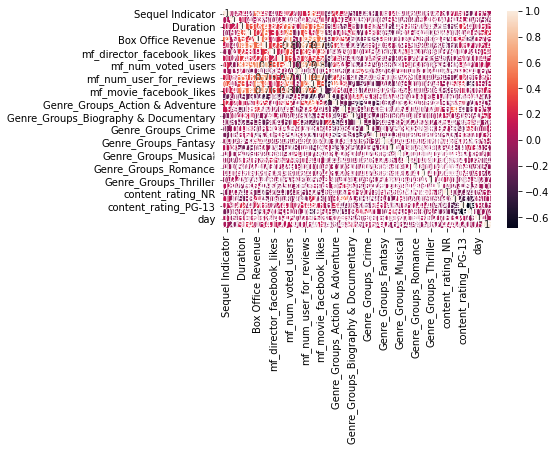

In [152]:
## This can be useful later but with lots of features, it doesnt look great
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [162]:
### This will show the highly positive correlated features
#Correlation with output variable
cor_target = abs(corrMatrix["Box Office Revenue"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Sequel Indicator                   0.447337
Duration                           0.342926
imdb_score                         0.262061
Box Office Revenue                 1.000000
mf_num_critic_for_reviews          0.471409
mf_director_facebook_likes         0.128727
mf_actor_1_facebook_likes          0.213997
mf_num_voted_users                 0.599430
mf_num_user_for_reviews            0.498285
mf_budget (Millions)               0.605404
mf_movie_facebook_likes            0.493910
mf_Domestic Share                  0.202576
Genre_Groups_Action & Adventure    0.248853
Genre_Groups_Animation & Family    0.257535
Genre_Groups_Comedy                0.129539
Genre_Groups_Drama                 0.182173
Genre_Groups_Fantasy               0.124488
content_rating_NR                  0.128283
content_rating_PG                  0.145769
content_rating_PG-13               0.181060
content_rating_R                   0.248574
Name: Box Office Revenue, dtype: float64

Multiple Regression

In [155]:
x2.shape

(719, 33)

In [156]:
y2.shape

(719, 1)

In [157]:
model.fit(x2,y2)

LinearRegression()

In [158]:
r_sq = model.score(x2,y2)

In [159]:
print('Coefficient of Determination', r_sq)

Coefficient of Determination 0.6273563753503528


Assumption testing

In [160]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

AttributeError: 'LinearRegression' object has no attribute 'resid'